In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
from dask.distributed import Client, LocalCluster
import dask.bag as db 

In [3]:
dask_cluster = LocalCluster(n_workers=20, threads_per_worker=1)
dask_client = Client(dask_cluster)

In [4]:
dask_client

Client Scheduler: tcp://127.0.0.1:55527 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 20 Cores: 20 Memory: 17.10 GB


# Get dictionary words

In [5]:
from tibert.dict import TibetanDict, TibetanEncoding

In [6]:
unicode_dict = TibetanDict(
    None,
    glob_override="../../tibert_data/dictionaries/for_spm/*",
    default_encoding=TibetanEncoding.UNICODE)

In [7]:
tib_words = set(unicode_dict.all_tibetan_words())

In [8]:
len(tib_words)

194863

# Get all letters in the corpora

In [9]:
from tibert.data import CorpusSplitType, KangyurLoader, TengyurLoader

In [10]:
tib_bag = db.concat([
    KangyurLoader("../../tibert_data/").to_bag(),
    TengyurLoader("../../tibert_data/").to_bag()])

In [11]:
all_letters = \
    sorted( \
        tib_bag \
            .flatten() \
            .distinct() \
            .compute())
' '.join(all_letters)

'  ं ऽ । ༀ ༄ ༅ ༈ ་ ༌ ། ༑ ༔ ༜ ༠ ༡ ༢ ༣ ༤ ༥ ༦ ༧ ༨ ༩ ༴ ༵ ༷ ༸ ༼ ༽ ཀ ཁ ག གྷ ང ཅ ཆ ཇ ཉ ཊ ཋ ཌ ཌྷ ཎ ཏ ཐ ད དྷ ན པ ཕ བ བྷ མ ཙ ཚ ཛ ཛྷ ཝ ཞ ཟ འ ཡ ར ལ ཤ ཥ ས ཧ ཨ ཀྵ ཪ ཱ ི ཱི ུ ཱུ ྲྀ ླྀ ཹ ེ ཻ ོ ཽ ཾ ཿ ྀ ཱྀ ྂ ྃ ྄ ྅ ྈ ྉ ྊ ྍ ྎ ྐ ྑ ྒ ྒྷ ྔ ྕ ྖ ྗ ྙ ྚ ྛ ྜ ྜྷ ྞ ྟ ྠ ྡ ྡྷ ྣ ྤ ྥ ྦ ྦྷ ྨ ྩ ྪ ྫ ྫྷ ྭ ྯ ྰ ྱ ྲ ླ ྴ ྵ ྶ ྷ ྸ ྐྵ ྺ ྻ ྼ ྾'

# Word dataframe

In [12]:
import unicodedata

In [13]:
import pandas as pd

In [14]:
tib_words_df = pd.DataFrame(tib_words, columns=["word"])
tib_words_df["word"] = tib_words_df.word.map(lambda w: w if w[-1] == '་' else w + '་')
tib_words_df

,word
0,ཤིན་ཏུ་མཛེས་
1,རྐང་བཀྲ་མ་
2,རི་ཁྲོད་ལོ་མ་གྱོན་མ་
3,ཕམ་ཉེས་
4,༅སྦྲང་ནག་ཤ་སྦྲང་ནག་པོ་
...,...
194858,སྦྱངས་པའི་ཡོན་ཏན་
194859,བློ་ངན་གསུམ་
194860,མེ་ཏོག་ལྡན་
194861,བློ་ཟློག་


In [15]:
tib_words_df["len"] = tib_words_df.word.map(len)
tib_words_df

,word,len
0,ཤིན་ཏུ་མཛེས་,12
1,རྐང་བཀྲ་མ་,10
2,རི་ཁྲོད་ལོ་མ་གྱོན་མ་,20
3,ཕམ་ཉེས་,7
4,༅སྦྲང་ནག་ཤ་སྦྲང་ནག་པོ་,22
...,...,...
194858,སྦྱངས་པའི་ཡོན་ཏན་,17
194859,བློ་ངན་གསུམ་,12
194860,མེ་ཏོག་ལྡན་,11
194861,བློ་ཟློག་,9


In [16]:
tib_words_df["syllables"] = tib_words_df.word.map(lambda w: sum([1 for c in w if c == '་']))
tib_words_df

,word,len,syllables
0,ཤིན་ཏུ་མཛེས་,12,3
1,རྐང་བཀྲ་མ་,10,3
2,རི་ཁྲོད་ལོ་མ་གྱོན་མ་,20,6
3,ཕམ་ཉེས་,7,2
4,༅སྦྲང་ནག་ཤ་སྦྲང་ནག་པོ་,22,6
...,...,...,...
194858,སྦྱངས་པའི་ཡོན་ཏན་,17,4
194859,བློ་ངན་གསུམ་,12,3
194860,མེ་ཏོག་ལྡན་,11,3
194861,བློ་ཟློག་,9,2


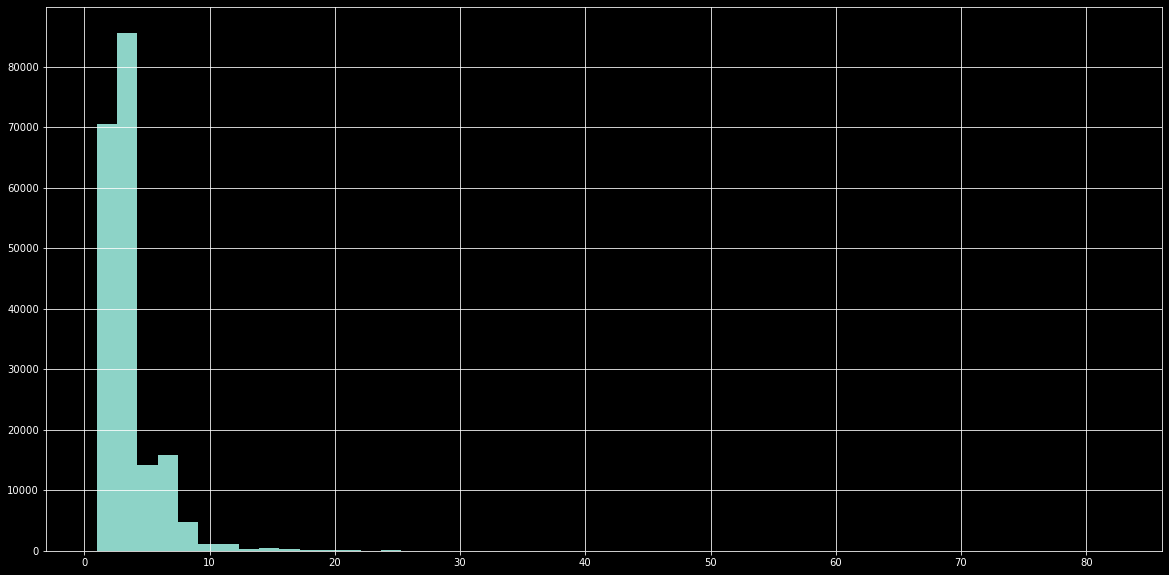

In [17]:
tib_words_df.syllables.hist(bins=50, figsize=(20, 10))

In [18]:
tib_words_df.len.describe()

count    194863.000000
mean         14.135449
std           9.148194
min           2.000000
25%           9.000000
50%          12.000000
75%          17.000000
max         335.000000
Name: len, dtype: float64

In [19]:
tib_words_df.syllables.describe()

count    194863.000000
mean          3.622678
std           2.313820
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          82.000000
Name: syllables, dtype: float64

In [20]:
tib_words_df[tib_words_df.syllables > 4].sort_values("len")

,word,len,syllables
134417,ཨ་ར་པ་ཙ་ན་,10,5
193011,ཁ་བ་ཅ་ད་ཀ་,10,5
101027,ཨ་ལུ་བ་ཀ་ར་,11,5
156066,ཨ་ཛ་ན་མ་ཎི་,11,5
168594,མ་ན་ནུ་ག་མ་,11,5
...,...,...,...
105789,འདུ་ཤེས་མེད་པའི་སྙོམས་འཇུག་དགེ་རྒྱས་ཀྱི་འདོད་ཆ...,253,64
22745,འགོག་པའི་སྙོམས་འཇུག་ཚོར་བ་དང་འདུ་ཤེས་རགས་པ་འགོ...,257,66
87451,བཀའ་ཤག་སྔར་གྱི་བོད་ས་གནས་སྲིད་གཞུང་སྟེ་ཆིང་རྒྱ...,259,62
173926,སྡེ་དགེའི་བསྟན་འགྱུར་དཀར་ཆག་ཀུན་མཁྱེན་ཉི་མའི་ག...,314,75


In [21]:
unicode_dict[tib_words_df.word[2096][:-1]]

['a kind of flower', 'layman, commoner, common people']

In [22]:
unicode_dict["ཟག་བཅས་ཀྱི་དགེ་བ"]

["conditioned virtue. Spiritual practice in which a dualistic point of reference is used. Includes the preliminaries, seven branches and so forth. Unconditioned virtue is the recognition of buddha nature, often called 'threefold purity.' These two aspects of virtue gather the two accumulations, remove the two obscurations, manifest the twofold knowledge, and actualize the two kayas"]

In [23]:
tib_words_df[tib_words_df.syllables < 5].sort_values("len")

,word,len,syllables
161971,ར་,2,1
57798,ཎ་,2,1
49209,བ་,2,1
134734,ཙ་,2,1
135973,ཚ་,2,1
...,...,...,...
143853,མཐུན་སྒྲིལ་སྐྱོན་བརྗོད་,23,4
137784,འདེམས་བསྐོའི་ཁྲིམས་ལུགས་,24,4
37506,བསྐྱོར་བསྐྱོད་འཁྲབ་སྟོན་,24,4
166934,དབུགས་དབྱུང་གཟེངས་བསྟོད་,24,4


In [24]:
unicode_dict["དབུགས་དབྱུང་གཟེངས་བསྟོད"]

['graced and honored']

In [25]:
tib_words_df[tib_words_df.syllables < 5].syllables.sum()

439974

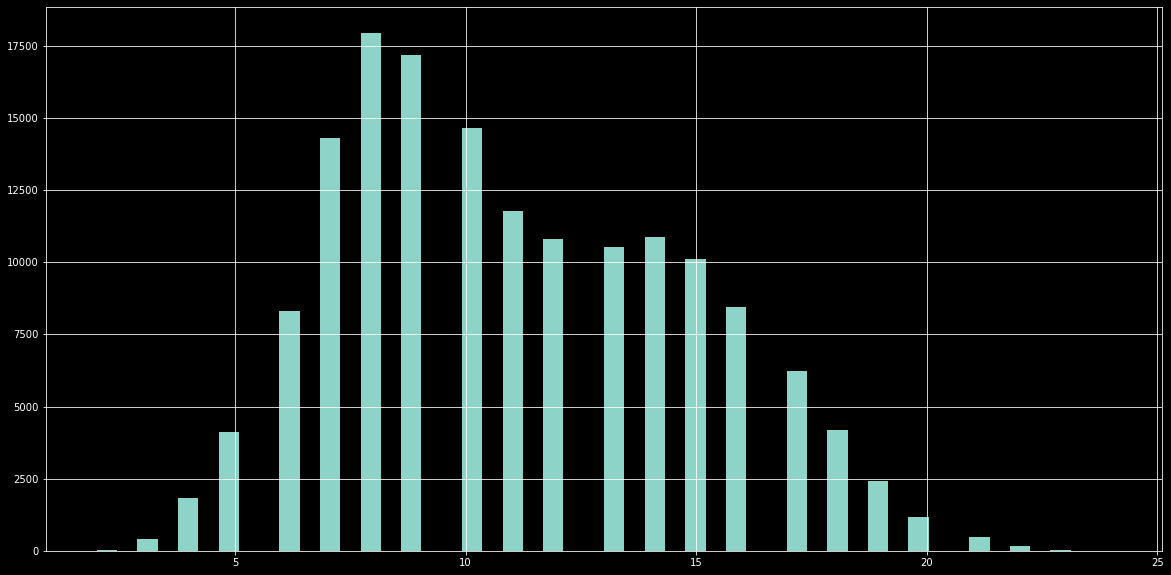

In [26]:
tib_words_df[tib_words_df.syllables < 5].len.hist(bins=50, figsize=(20, 10))

In [28]:
# set([(c, unicodedata.name(c)) for w in tib_words for c in w])

# Make training set

In [29]:
train_df = tib_words_df[tib_words_df.syllables < 5]

In [30]:
with open("../../tibert_data/training/tokenizer/spm_train.txt", mode='w', encoding='utf-8') as f:
    for c in all_letters:
        f.write(c + '\n')
    for w in train_df.word.tolist():
        f.write(w + '\n')

# Train tokenizer

In [31]:
from tibert.models import TibertTokenizer

In [32]:
TibertTokenizer.train(
    "c:/workspace/tibert_data/training/tokenizer/spm_train.txt",
    'c:/workspace/tibert_data/training/models/tokenizer/tibert_spm_bpe_tiny',
    model_type='bpe',
    vocab_size=1000)

In [33]:
TibertTokenizer.train(
    "c:/workspace/tibert_data/training/tokenizer/spm_train.txt",
    'c:/workspace/tibert_data/training/models/tokenizer/tibert_spm_bpe_small',
    model_type='bpe',
    vocab_size=5000)

In [34]:
TibertTokenizer.train(
    "c:/workspace/tibert_data/training/tokenizer/spm_train.txt",
    'c:/workspace/tibert_data/training/models/tokenizer/tibert_spm_bpe_big',
    model_type='bpe',
    vocab_size=10000)

# Test tokenizer

In [35]:
from tibert.models import TibertTokenizer

In [36]:
tokenizer = TibertTokenizer.from_pretrained('tibert-bpe-large')
tokenizer.stochastic_tokenization = False

In [37]:
from tibert.data import CorpusSplitType, KangyurLoader, TengyurLoader

In [38]:
tib_df = KangyurLoader("../../tibert_data/").dataframe.append(TengyurLoader("../../tibert_data/").dataframe)

In [39]:
tib_samples = tib_df.text.sample(frac=0.01).compute().tolist()
tib_samples = tib_df.text.head(20).tolist()
len(tib_samples), tib_samples[0]

(20, '')

In [40]:
i = 0

In [53]:
tokenizer.decode(tokenizer.encode(tib_samples[i]))

'[CLS] པོ་འདི་ནི་གདུག་པ། ཕ་རོལ་གནོན་པ། དཔུང་དང་མཐུ་ཆེ་བར་གྱུར་ལ། དེས་ཡུ་བུ་ཅག་ལ་འདི་དང་འདི་སྐད་ཅེས་སྤྲིང་ན། དེ་ལ་ཡུ་བུ་ཅག་གིས་ཇི་ལྟར་བསྒྲུབ་པར་བྱ། དེ་དག་གིས་ཚིགས་སུ་བཅད་པ་སྨྲས་པ། ཡུལ་དང་སྲོག་ལ་གནོད་གྱུར་ན། ། སྐྱེས་བུས་ཀུན་དུ་སྲོག་བསྲུང་བྱ། །བློ་ཡིས་གཉིས་ཀ་དཔྱད་བྱས་ན། །ཡུལ་ནི་ཡང་རྙེད་སྲོག་རྣམས་མིན། །ལྷ་རྣམ་པ་ཐམས་ཅད་དུ་སླར་འབྱུང་བར་བགྱིའོ། །དེ་རལ་གྲི་མགུལ་དུ་ཐོགས་ཏེ་ཕྱིར་བྱུང་བ་དང་། ཨང་གའི་རྒྱལ་པོས་དེ་ལ་ལོ་ཐང་དང་དཔྱ་ཕབ་སྟེ་དེ་ཉིད་དུ་ བཞག་གོ། །གང་གི་ཚེ་བཅོམ་ལྡན་འདས་བྱང་ཆུབ་སེམས་དཔའ་དགའ་ལྡན་གྱི་གནས་ན་བཞུགས་པས་གཟིགས་པ་ལྔ་པོ་དག་ལ་གཟིགས་ནས་འདོད་པ་ན་སྤྱོད་པའི་ལྷ་དྲུག་པོ་དག་ལ་ལན་གསུམ་བསྒོ་བ་མཛད་དེ། གླང་པོ་ཆེ་ལྟར་སྣང་བར་བསྒྱུར་ཏེ། ཡུམ་གྱི་ལྷུམས་སུ་ ཞུགས་པ་དེའི་ཚེ་ན་ས་ཆེན་པོ་ཤིན་ཏུ་གཡོས་པར་གྱུར་ཅིང་འཇིག་རྟེན་འདི་ཐམས་ཅད་ཀྱང་སུམ་བཅུ་རྩ་གསུམ་པའི་ལྷ་རྣམས་ཀྱི་ཁ་དོག་གི་མཐུ་བས་ལྷག་པའི་སྣང་བ་རྒྱ་ཆེན་པོས་ཁྱབ་པར་གྱུར་ཅིང་། འཇིག་རྟེན་གྱི་འཇིག་རྟེན་གྱི་བར་གང་ན་ཉི་མ་དང་ཟླ་བ་འདི་ལྟར་རྫུ་འཕྲུལ་ཆེ་བ། འདི་ལྟར་མཐུ་ཆེ་བ་འདི་གཉིས་ཀྱི་འོད་དག་ཉམས་སུ་མི་མྱོང་བའི་མུན་པ་མུན་གནག་མུན་པར་བྱེད་པས། གནག་པར་གྱུར་པ་གང་དག་ཡིན་པ་ད

In [54]:
' '.join(tokenizer.tokenize(tib_samples[i]))

'▁པོ་ འདི་ ནི་ གདུག་ པ ། ▁ཕ་རོལ་ གནོན་ པ ། ▁དཔུང་ དང་ མཐུ་ ཆེ་ བར་གྱུར་ ལ ། ▁དེས་ ཡུ་ བུ་ ཅག་ ལ་ འདི་ དང་ འདི་ སྐད་ ཅེས་ སྤྲིང་ ན ། ▁དེ་ལ་ ཡུ་ བུ་ ཅག་ གིས་ ཇི་ལྟར་ བསྒྲུབ་ པར་ བྱ ། ▁དེ་དག་ གིས་ ཚིགས་ སུ་ བཅད་པ་ སྨྲས་ པ ། ▁ཡུལ་ དང་ སྲོག་ ལ་ གནོད་ གྱུར་ ན ། ▁ ། ▁སྐྱེས་ བུས་ ཀུན་ དུ་ སྲོག་ བསྲུང་ བྱ ། ▁ ། བློ་ ཡིས་ གཉིས་ ཀ་ དཔྱད་ བྱས་ ན ། ▁ ། ཡུལ་ ནི་ ཡང་ རྙེད་ སྲོག་ རྣམས་ མ ིན ། ▁ ། ལྷ ་ར ྣམ་ པ་ ཐམས་ཅད་ དུ་ སླ ར་ འབྱུང་ བར་ བགྱ ི འ ོ ། ▁ ། དེ་ རལ་ གྲི་ མགུལ་ དུ་ ཐོགས་ ཏེ་ ཕྱིར་ བྱུང་བ་ དང་ ། ▁ཨང་ གའི་ རྒྱལ་ པོས་ དེ་ ལ་ ལོ་ ཐང་ དང་ དཔྱ་ ཕབ་ སྟེ་ དེ་ ཉིད་དུ་ ▁བཞག་ ག ོ ། ▁ ། གང་ གི་ ཚེ་ བཅོམ་ ལྡན་ འདས་ བྱང་ཆུབ་ སེམས་དཔའ་ དགའ་ ལྡན་ གྱི་གནས་ ན་ བཞུགས་ པས་ གཟིགས་པ་ ལྔ་ པོ་ དག་ ལ་ གཟིགས་ ནས་ འདོད་པ་ ན་ སྤྱོད་ པའི་ལྷ་ དྲུག་ པོ་ དག་ ལ་ ལན་ གསུམ་ བསྒ ོ་བ་ མཛད་ ད ེ ། ▁གླང་པོ་ ཆེ་ ལྟར་སྣང་ བར་ བསྒྱུར་ ཏ ེ ། ▁ཡུམ་ གྱི་ ལྷ ུམས་ སུ་ ▁ཞ ུགས་པ་ དེའི་ ཚེ་ ན་ ས་ ཆེན་པོ་ ཤིན་ ཏུ་ གཡོས་ པར་གྱུར་ ཅིང་ འཇིག་རྟེན་ འདི་ ཐམས་ཅད་ ཀྱང་ སུམ་ བཅུ་ རྩ་ གསུམ་ པའི་ ལྷ ་རྣམས་ ཀྱི་ ཁ་དོག་ གི་ མཐུ་ བས་ ལྷག་ པའི་ སྣང་བ་ རྒྱ

In [55]:
i += 1

In [52]:
from tqdm.notebook import tqdm
import pandas as pd

In [54]:
tokens, decoding = [], []
for idx, token in tqdm(enumerate(range(10000))):
    tokens.append(token)
    decoding.append(tokenizer.decode([token]))
dec_df = pd.DataFrame({"token": tokens, "decoding": decoding})
dec_df["len"] = dec_df.decoding.map(len)
dec_df

,token,decoding,len
0,0,<pad>,5
1,1,<unk>,5
2,2,[CLS],5
3,3,[SEP],5
4,4,[MASK],6
...,...,...,...
9995,9995,ྶ,1
9996,9996,ྸ,1
9997,9997,ྺ,1
9998,9998,ྻ,1


In [56]:
dec_df[dec_df.len == 0]

,token,decoding,len
9874,9874,,0
